In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   # for heatmap


In [98]:
plt.style.use("seaborn-v0_8-darkgrid")

In [99]:
# Load the data
data = pd.read_csv("../files/input/AMVA_Accidentalidad_20191022_2.csv", encoding="latin1", sep=";").copy()
data.head(50)

,COD_MUNICIPIO,MUNICIPIO,FECHA,HORA,DÍA DE LA SEMANA,CLASE,DIRECCIÓN,GRAVEDAÑOSSADAÑOSS,BARRIO,COMUNA,DISEÑO
0,79.0,BARBOSA,03/01/2015,01:00:00 PM,SABADO,CHOQUE,VIA BELLO HATILLO KM16+200,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
1,79.0,BARBOSA,07/01/2015,03:00:00 PM,MIERCOLES,CHOQUE,HATILLO-BELLO KM 18+00,HERIDOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA
2,79.0,BARBOSA,04/01/2015,04:01:00 AM,DOMINGO,CHOQUE,KM 16+395 METROS BARBOSA-HATILLO,HERIDOS,VIA EL HATILLO-CISNEROS,SIN INFORMACIÓN,TRAMO DE VIA
3,79.0,BARBOSA,05/01/2015,12:00:00 PM,LUNES,CHOQUE,BELLO- DON MATIAS KM 9+600,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
4,79.0,BARBOSA,11/01/2015,01:30:00 PM,DOMINGO,CHOQUE,LOS ABUELOS,DAÑOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA
5,79.0,BARBOSA,06/01/2015,11:50:00 PM,MARTES,CHOQUE,BELLO DON MATIAS KM 23+200,DAÑOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
6,79.0,BARBOSA,06/01/2015,06:30:00 AM,MARTES,CHOQUE,VIA HATILLO BELLO KM 18+00 BARBOSA,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
7,79.0,BARBOSA,10/01/2015,01:00:00 PM,SABADO,ATROPELLO,HSVP BARBOSA CALLE 13 CRA 15,HERIDOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA
8,79.0,BARBOSA,08/01/2015,06:00:00 PM,JUEVES,CHOQUE,BELLO DONMATIAS KM 34+050,DAÑOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA
9,79.0,BARBOSA,10/01/2015,04:30:00 PM,SABADO,CHOQUE,BARBOSA CISNEROS KM 14+300,DAÑOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203450 entries, 0 to 203449
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   COD_MUNICIPIO       203435 non-null  float64
 1   MUNICIPIO           203435 non-null  object 
 2   FECHA               203435 non-null  object 
 3   HORA                203435 non-null  object 
 4   DÍA DE LA SEMANA    203435 non-null  object 
 5   CLASE               203435 non-null  object 
 6   DIRECCIÓN           203435 non-null  object 
 7   GRAVEDAÑOSSADAÑOSS  203435 non-null  object 
 8   BARRIO              203385 non-null  object 
 9   COMUNA              203435 non-null  object 
 10  DISEÑO              203435 non-null  object 
dtypes: float64(1), object(10)
memory usage: 17.1+ MB


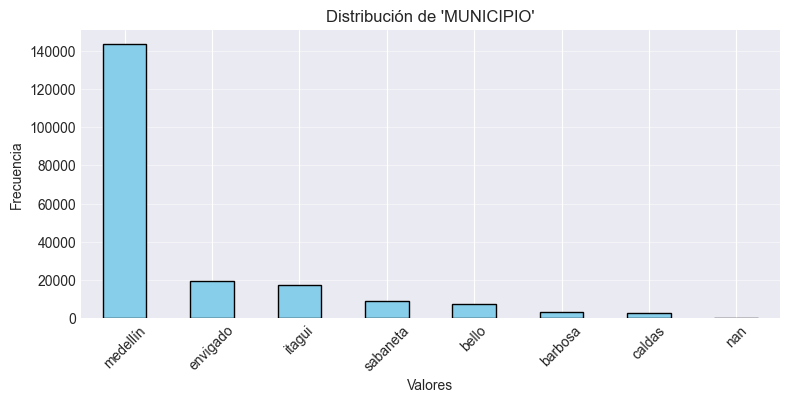

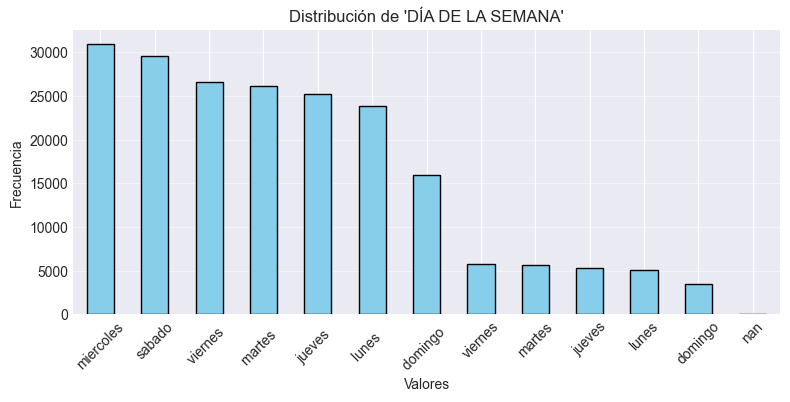

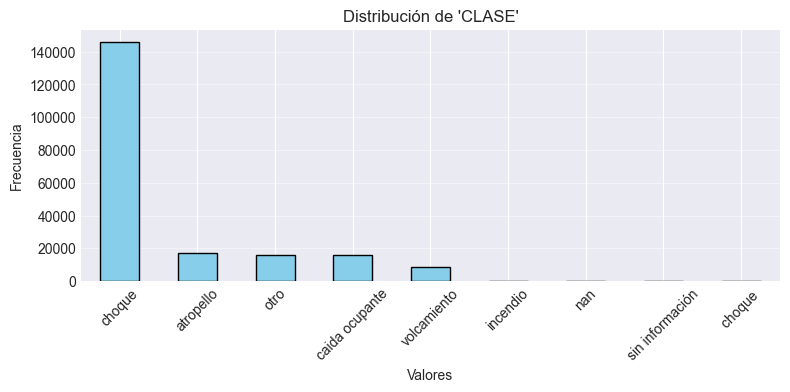

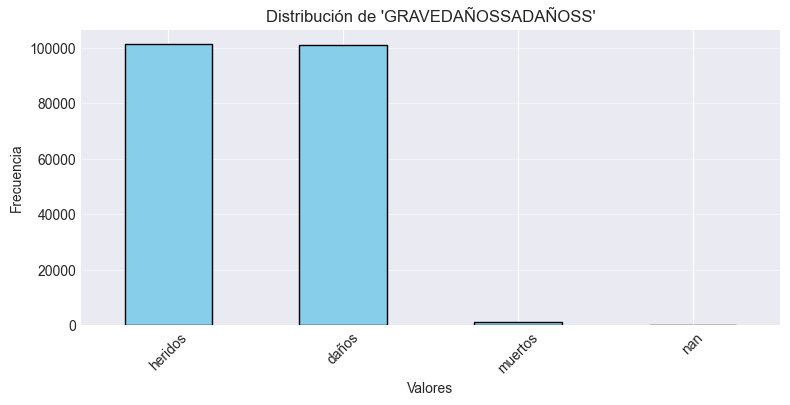

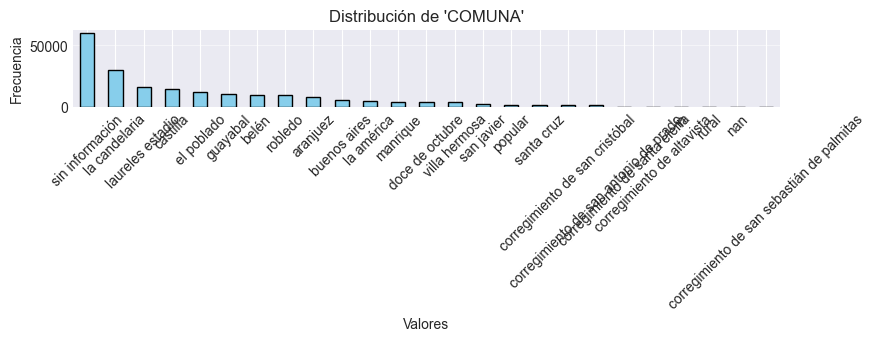

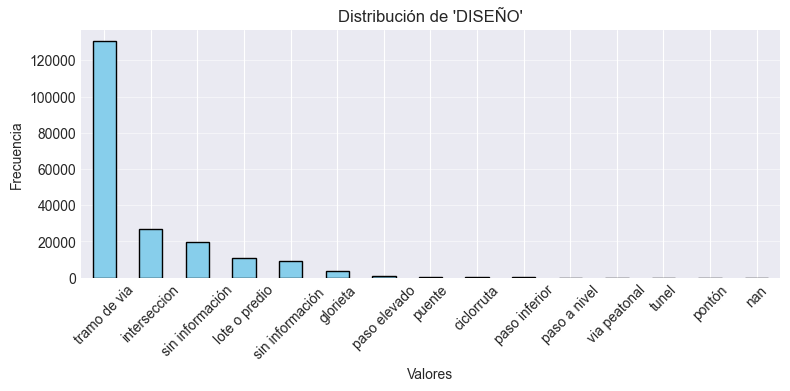

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

def graficar_histogramas(data):
    """
    Genera histogramas para todas las columnas del DataFrame excepto:
    - COD_MUNICIPIO
    - FECHA
    - DIRECCIÓN
    """
    columnas_excluir = {'COD_MUNICIPIO', 'FECHA', 'HORA', 'DIRECCIÓN', 'BARRIO'}
    columnas_a_graficar = [col for col in data.columns if col not in columnas_excluir]
    
    for columna in columnas_a_graficar:
        plt.figure(figsize=(8, 4))
        
        if data[columna].dtype == 'object' or data[columna].dtype.name == 'category':
            data[columna] = data[columna].astype(str).str.lower().fillna("desconocido")  # Manejo de NaN
            data[columna].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
            plt.ylabel("Frecuencia")
        else:
            plt.hist(data[columna].dropna(), bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
            plt.ylabel("Frecuencia")
        plt.tight_layout() #Ajustar mejor los histogramas
        plt.title(f"Distribución de '{columna}'")
        plt.xlabel("Valores")
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.5)
        plt.show()

# Ejemplo de uso con un DataFrame llamado 'data'
# data = pd.read_csv("tu_archivo.csv")
graficar_histogramas(data)



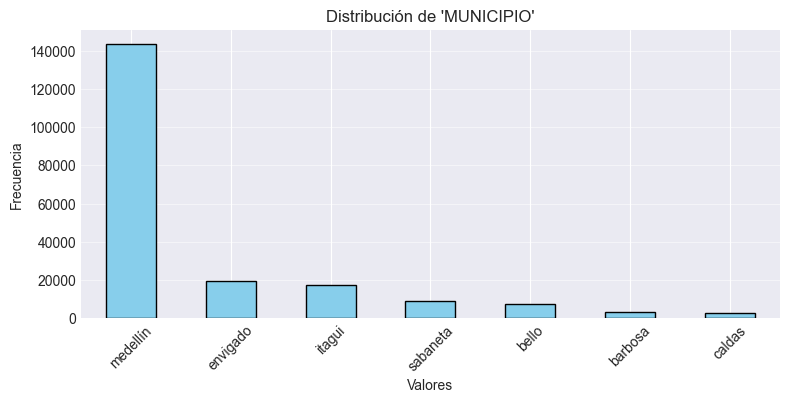

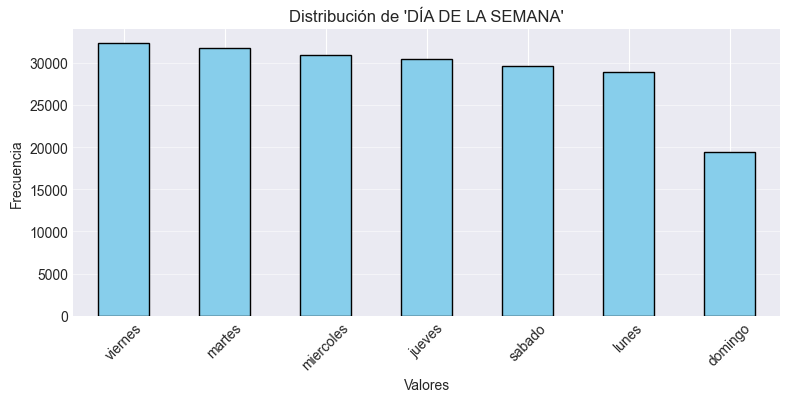

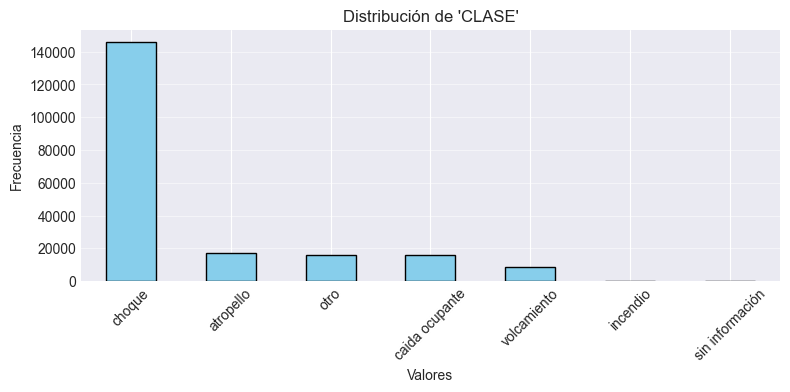

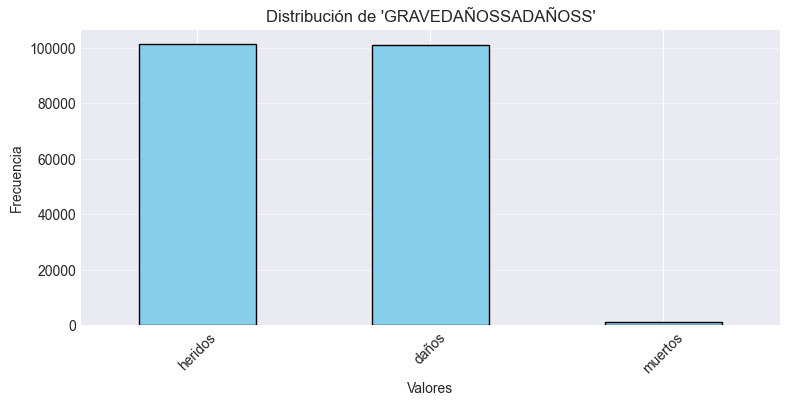

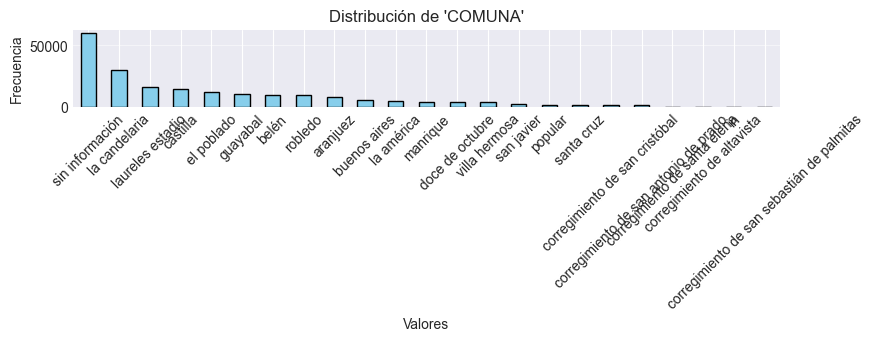

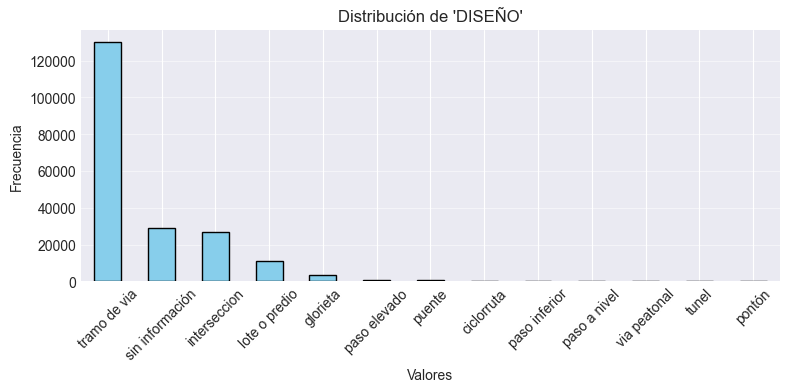

In [102]:
data = data.dropna(subset=['BARRIO', 'DIRECCIÓN', 'HORA', 'DIRECCIÓN', 'BARRIO'])
# Eliminar espacios en blanco al principio y al final de las cadenas
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.strip()
graficar_histogramas(data)


ZONA MAPA

In [103]:
pip install geopy


^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from geopy.geocoders import Nominatim
loc = Nominatim(user_agent="Geopy Library")

In [ ]:
data.head()

,COD_MUNICIPIO,MUNICIPIO,FECHA,HORA,DÍA DE LA SEMANA,CLASE,DIRECCIÓN,GRAVEDAÑOSSADAÑOSS,BARRIO,COMUNA,DISEÑO
0,79.0,BARBOSA,03/01/2015,01:00:00 PM,SABADO,CHOQUE,VIA BELLO HATILLO KM16+200,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
1,79.0,BARBOSA,07/01/2015,03:00:00 PM,MIERCOLES,CHOQUE,HATILLO-BELLO KM 18+00,HERIDOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA
2,79.0,BARBOSA,04/01/2015,04:01:00 AM,DOMINGO,CHOQUE,KM 16+395 METROS BARBOSA-HATILLO,HERIDOS,VIA EL HATILLO-CISNEROS,SIN INFORMACIÓN,TRAMO DE VIA
3,79.0,BARBOSA,05/01/2015,12:00:00 PM,LUNES,CHOQUE,BELLO- DON MATIAS KM 9+600,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
4,79.0,BARBOSA,11/01/2015,01:30:00 PM,DOMINGO,CHOQUE,LOS ABUELOS,DAÑOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA


In [223]:
data_med = data[["MUNICIPIO","DIRECCIÓN","BARRIO","COMUNA"]]

data_med = data_med[data_med["MUNICIPIO"] == "medellín"]

conteo_accidentes = data_med.value_counts().reset_index()

conteo_accidentes.columns = list(data_med.columns) + ['#ACCIDENTES']

conteo_accidentes['DIRECCIÓN'] = conteo_accidentes['DIRECCIÓN'].str.replace(r'\bCR\b', 'carrera', regex=True).str.replace(r'\bCL\b', 'calle', regex=True)

conteo_accidentes.head(30)

,MUNICIPIO,DIRECCIÓN,BARRIO,COMUNA,#ACCIDENTES
0,medellín,carrera 64 C calle 78,TERMINAL DE TRANSPORTE,castilla,694
1,medellín,carrera 64 C calle 67,CARIBE,castilla,416
2,medellín,carrera 80 calle 65,FACULTAD DE MINAS U. NACIONAL,robledo,389
3,medellín,carrera 52 calle 10,CAMPO AMOR,guayabal,382
4,medellín,carrera 63 calle 44,NARANJAL,laureles estadio,367
5,medellín,carrera 48 calle 10,MANILA,el poblado,358
6,medellín,carrera 64 C calle 72,CARIBE,castilla,355
7,medellín,carrera 57 calle 44,GUAYAQUIL,la candelaria,324
8,medellín,carrera 65 calle 10,CAMPO AMOR,guayabal,282
9,medellín,carrera 65 calle 80,TERMINAL DE TRANSPORTE,castilla,277


In [259]:
conteo_accidentes.shape[0]

25262

In [268]:
funciona = 0
no_funciona = 0
for i in range(conteo_accidentes.shape[0]):
    direccion = f"{conteo_accidentes.loc[i]['DIRECCIÓN']}, {conteo_accidentes.loc[i]['BARRIO']}, {conteo_accidentes.loc[i]['COMUNA']}, {conteo_accidentes.loc[i]['MUNICIPIO']}"
    getLoc = loc.geocode(
    direccion, 
    country_codes='CO',
    )
    if getLoc:
        funciona +=1
    else:
        no_funciona += 1
    print(f"funciona {funciona},no funciona {no_funciona}")

funciona 0,no funciona 1
funciona 0,no funciona 2
funciona 0,no funciona 3
funciona 1,no funciona 3
funciona 2,no funciona 3
funciona 3,no funciona 3
funciona 3,no funciona 4
funciona 4,no funciona 4
funciona 5,no funciona 4
funciona 5,no funciona 5
funciona 6,no funciona 5
funciona 7,no funciona 5
funciona 8,no funciona 5
funciona 9,no funciona 5
funciona 10,no funciona 5
funciona 11,no funciona 5
funciona 11,no funciona 6
funciona 11,no funciona 7
funciona 12,no funciona 7
funciona 12,no funciona 8
funciona 13,no funciona 8
funciona 14,no funciona 8
funciona 15,no funciona 8
funciona 16,no funciona 8
funciona 17,no funciona 8
funciona 18,no funciona 8
funciona 19,no funciona 8
funciona 20,no funciona 8
funciona 20,no funciona 9
funciona 21,no funciona 9
funciona 22,no funciona 9
funciona 22,no funciona 10
funciona 23,no funciona 10
funciona 23,no funciona 11
funciona 24,no funciona 11
funciona 25,no funciona 11
funciona 26,no funciona 11
funciona 27,no funciona 11
funciona 28,no func

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=calle+44+carrera+92%2C+CAMPO+ALEGRE%2C+la+am%C3%A9rica%2C+medell%C3%ADn&format=json&limit=1&countrycodes=CO (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))